피마족 인디언 당뇨병 발병 유무를 예측하는 이진 분류 문제<br>
(1: 당뇨병,  0: 정상)

데이터 준비하기

In [1]:
import numpy
import pandas
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# 랜덤 시드 고정시키기
numpy.random.seed(5)

In [2]:
dataset = numpy.loadtxt('diabetes.csv', delimiter = ',', skiprows = 1)  # 값이 모두 숫자이기때문에 굳이 판다스말고 넘파이로 가져와본다
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

데이터셋 생성하기 - 입력(속성값 8 개: 문제집), 출력(판정결과 1개: 정답지) 변수로 분리

In [3]:
# 학습 데이터 ...700개 and 8번수 가져오기
X_train = dataset[:700, 0:8]
y_train = dataset[:700, 8]

# 테스트 데이터 68개 and 1변수 가져오기
X_test = dataset[700:, 0:8]
y_test = dataset[700:, 8]

모델 구성하기

In [4]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


모델 학습과정 설정하기

In [7]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']) # == 'acc'

모델 학습시키기

In [8]:
history = model.fit(X_train, y_train,
                    epochs = 1500,
                    batch_size = 64)

Epoch 1/1500
11/11 [==============================] - 12s 1ms/step - loss: 12.1724 - accuracy: 0.6616
Epoch 2/1500
11/11 [==============================] - 0s 1ms/step - loss: 8.3273 - accuracy: 0.6379
Epoch 3/1500
11/11 [==============================] - 0s 2ms/step - loss: 6.1070 - accuracy: 0.6531
Epoch 4/1500
11/11 [==============================] - 0s 1ms/step - loss: 4.0818 - accuracy: 0.6739
Epoch 5/1500
11/11 [==============================] - 0s 1ms/step - loss: 3.2377 - accuracy: 0.6542
Epoch 6/1500
11/11 [==============================] - 0s 1ms/step - loss: 2.2304 - accuracy: 0.6653
Epoch 7/1500
11/11 [==============================] - 0s 1ms/step - loss: 2.1364 - accuracy: 0.6368
Epoch 8/1500
11/11 [==============================] - 0s 1ms/step - loss: 1.8228 - accuracy: 0.6442
Epoch 9/1500
11/11 [==============================] - 0s 1ms/step - loss: 1.7107 - accuracy: 0.6245
Epoch 10/1500
11/11 [==============================] - 0s 1ms/step - loss: 1.6376 - accuracy: 0.64

학습결과 그려보기

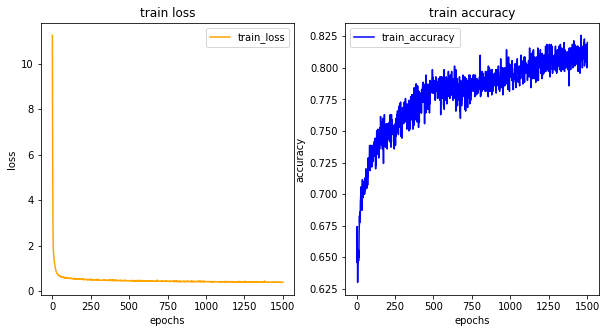

In [9]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

모델 평가하기

In [10]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))  # scores[1]엔 손실점수가 있어서...

3/3 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7941
accuracy: 79.41%


모델 성능 평가

In [18]:
# ROC
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [12]:
# 모델 예측하기
result = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
from sklearn import metrics
report = metrics.classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85        41
         1.0       0.88      0.56      0.68        27

    accuracy                           0.79        68
   macro avg       0.82      0.75      0.76        68
weighted avg       0.81      0.79      0.78        68



In [17]:
print(metrics.precision_score(y_test, result))
print(metrics.recall_score(y_test, result))

0.8823529411764706
0.5555555555555556


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


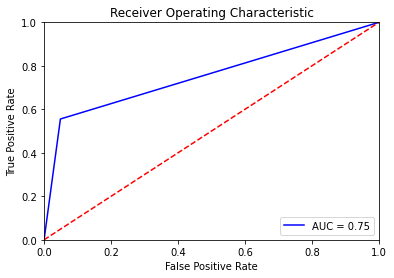

In [19]:
plot_auc_roc(model)